In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
!ls

AB Testing.ipynb      Qestions.ipynb        car_data_mani.ipynb
Numpy_exp.ipynb       README.md             data
Pandas_exp.ipynb      SQL.ipynb             python_question.ipynb
Pandas_exp.md         X_hold.csv            readychef.pgsql


In [3]:
df = pd.read_csv('X_hold.csv')

In [4]:
df.head()

,year,mileage,model_1500,model_2500,model_328i,model_3500,model_3series,model_4runner,model_5series,model_a4,...,paint_color_custom,paint_color_green,paint_color_grey,paint_color_orange,paint_color_purple,paint_color_red,paint_color_silver,paint_color_white,paint_color_yellow,paint_color_nan
0,0.375,0.576461,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,0.050,-1.464440,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2,0.250,-0.304304,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,0.275,1.457649,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0.250,-0.280987,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19098 entries, 0 to 19097
Columns: 163 entries, year to paint_color_nan
dtypes: float64(2), int64(161)
memory usage: 23.8 MB


In [6]:
df.sample(n=10)

,year,mileage,model_1500,model_2500,model_328i,model_3500,model_3series,model_4runner,model_5series,model_a4,...,paint_color_custom,paint_color_green,paint_color_grey,paint_color_orange,paint_color_purple,paint_color_red,paint_color_silver,paint_color_white,paint_color_yellow,paint_color_nan
1242,0.175,-0.735155,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
8047,0.275,1.999919,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
13999,0.075,-1.296336,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
12789,0.075,-1.278712,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
12773,0.425,-0.655814,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
9626,0.350,0.779812,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
8955,0.125,-1.047621,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
734,0.075,-1.496959,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
12667,0.325,1.217000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
18932,0.350,1.169568,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [7]:
df['year'].fillna(0, inplace=True)
df['year'].apply(lambda x : x+1 if x<.5 else 0).head()

0    1.375
1    1.050
2    1.250
3    1.275
4    1.250
Name: year, dtype: float64

In [8]:
df.loc[df['year']>.5].head()

,year,mileage,model_1500,model_2500,model_328i,model_3500,model_3series,model_4runner,model_5series,model_a4,...,paint_color_custom,paint_color_green,paint_color_grey,paint_color_orange,paint_color_purple,paint_color_red,paint_color_silver,paint_color_white,paint_color_yellow,paint_color_nan
24,0.675,1.711838,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
29,0.700,0.889096,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
46,0.525,-0.050539,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
51,0.700,0.152812,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
59,0.600,0.931342,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [9]:
df1 = df.sample(10)
df2 = df.sample(20)

In [10]:
df1.merge(df2, on='year', how='outer').head()

,year,mileage_x,model_1500_x,model_2500_x,model_328i_x,model_3500_x,model_3series_x,model_4runner_x,model_5series_x,model_a4_x,...,paint_color_custom_y,paint_color_green_y,paint_color_grey_y,paint_color_orange_y,paint_color_purple_y,paint_color_red_y,paint_color_silver_y,paint_color_white_y,paint_color_yellow_y,paint_color_nan_y
0,0.775,-0.101377,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.350,0.432420,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.100,-1.406213,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.100,-1.406213,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.100,-1.406213,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [11]:
df3=pd.concat([df1, df2], axis=0)

(array([5., 4., 6., 2., 1., 2., 1., 1., 3., 2., 2., 0., 0., 0., 0., 0., 0.,
        0., 0., 1.]),
 array([0.05   , 0.08625, 0.1225 , 0.15875, 0.195  , 0.23125, 0.2675 ,
        0.30375, 0.34   , 0.37625, 0.4125 , 0.44875, 0.485  , 0.52125,
        0.5575 , 0.59375, 0.63   , 0.66625, 0.7025 , 0.73875, 0.775  ]),
 <a list of 20 Patch objects>)

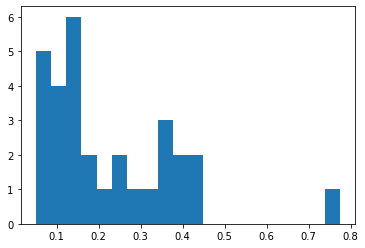

In [12]:
plt.hist(df3['year'], bins=20)

In [13]:
from sklearn.linear_model import LinearRegression

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
lr=LinearRegression()

In [16]:
y=df.pop('year')

In [17]:
X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=.2)

In [18]:
model=lr.fit(X_train, y_train)

In [19]:
model.score(X_test, y_test)

0.5778265610230406

<BarContainer object of 20 artists>

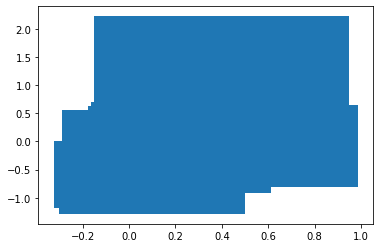

In [20]:
plt.bar(df2.year, df2.mileage)

In [21]:
df = pd.DataFrame(data={"lap": [1,2,3,5,6,7,10,12,13], "time": [5,10,5, 2,4,3,10,5,10]})

In [22]:
df

,lap,time
0,1,5
1,2,10
2,3,5
3,5,2
4,6,4
5,7,3
6,10,10
7,12,5
8,13,10
